# Systemtechnik für Energieeffizienz (SYE) Projektaufgabe Winter 2025<br>
# *IN ARBEIT*

- [ ] TODO Link oben aus Projektaufgabe 2022 herausnehmen und hier einfügen

**Das Projekt ist eine Teilprüfungsleistung im Modul SYE. Bewertet wird zum einen die Erfüllung der Projektaufgabe, wie sie hier beschrieben ist (90% der Punkte). Weitere 10% der Punkte sind für die Teilnahme
an der Exkursion reserviert. Falls diese nicht stattfinden kann, wird die Projektaufgabe zu 100% für die Bewertung der Teilprüfungsleistung herangezogen.**<br>
**Für das Projekt bearbeiten Sie in einem Team von 3-4 Studierenden eine Aufgabenstellung zur Energieeffizienz mit systemtechnischen Methoden. Damit die Projektergebnisse sich untereinander vergleichen lassen, stimmen wir gewisse Randbedingungen in der live-Veranstaltung gemeinsam ab.**<br>
**ACHTUNG FOLGENDES AKTUALISIEREN, NEUE PRÜFUNGSLEISTUNG a) UNTERLAGEN und b) PRÄSENTATION**<br>
**Bewertet wird die Präsentation und die Unterlagen (Jupyter Notebook, Messdaten, Notizen, Bewertungstabellen, etc.), die vor dem Präsentationstermin abzugeben sind. Bitte achten Sie für die Bewertung darauf, dass Ihr individueller Beitrag sichtbar wird, indem Sie eine Tabelle beifügen, in der alle Arbeitspakete und Prozentzahlen der einzelnen Beiträge genannt sind.**<br>
_Themenspeicher_:
- Analysieren mehrerer Datensätze von openmeter und nach bestimmten Parametern vergleichen
- Sensitivitätsanalyse mit Parametern aus dem IPCC-Bericht und Daten daraus (z. B. ändert sich der Photovoltaik-Ertrag ggf. oder es ändert sich der Heizungsbedarf bzw. die überschüssige Abwärme), auf podcast "Das Klima" verweisen und auf technical summary und Datenquellen (wo auch immer die liegen) bzw. Generatoren für künstliches Wetter der Zukunft
- Gasfreie Welt: wie kann Abwärme (gibt's da relevante Zeitreihen?) aus anderen Betrieben helfen? Und wie kann Elektrifizierung unterstützen?
- Handarbeit zuhause statt Energiekosten: welche Energiedienstleistungen lassen sich durch nicht-energetisches ersetzen (z. B. dicke Pullover anziehen, per Hand abspülen gesammeltes Geschirr, ..) - wie viel Energie spart das, wie viel Arbeitszeit kostet das und wie viel Geld spart das? Für welche Haushalte ist das machbar? In welchen Ländern weltweit ist so ein Verhalten Standard und welchen Energiebedarf haben die?
- Suffizienz: wann hat vermiedener Energiebedarf eine positive Auswirkung auf die Lebensqualität? wie wirkt sich das monetär, energetisch und ökologisch aus? ggf. auch politische Suffizienzmaßnahmen vergleichen https://blog.oeko.de/eine-datenbank-voller-politischer-suffizienz-massnahmen/
- Auswirkung von Energieeffizienzmaßnahmen auf Herstellungsprozesse und damit CO2-Aufwand für Herstellung von (Haushalts-/IT-)Geräten
- Sensitivität von Energieeffizienzmaßnahmen - worst case und best case Annahmen vergleichen bzgl. Energieeffekt und CO2-Effekt

## python konfigurieren

### Module importieren

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import holidays
import seaborn as sns
import plotly
import plotly.graph_objects as go
import sys
import os
import locale
from distutils.spawn import find_executable

print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('holidays', holidays.__version__)
print('seaborn', sns.__version__)
print('plotly', plotly.__version__)
print('sys', sys.version)
print('os', os)
print('locale', locale)

Versionen der verwendeten python-Module: 
numpy 2.0.1
matplotlib 3.9.1
pandas 2.2.2
datetime <module 'datetime' from '/home/franzi/.pyenv/versions/miniconda-latest/envs/p4elecs/lib/python3.12/datetime.py'>
holidays 0.53
seaborn 0.13.2
plotly 5.23.0
sys 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:12:24) [GCC 11.2.0]
os <module 'os' (frozen)>
locale <module 'locale' from '/home/franzi/.pyenv/versions/miniconda-latest/envs/p4elecs/lib/python3.12/locale.py'>


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
locale.setlocale(locale.LC_ALL, '')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    #pd.set_option('display.latex.repr', True)
    #pd.set_option('display.latex.longtable', True)

### Funktionen definieren

## Motivation: wozu das Ganze?

Motivation für dieses Fokusthema

## Lernziele: was lernen Sie hier?

<div class="alert alert-block alert-info"><b>Lernziele für das Projekt: </b>

*am Beispiel xyz*
- Anforderungen an ein Energie verwendendes System definieren
- Energiedaten aus Messungen und Literatur analysieren mit python
- Energiedaten generieren mit python
- Lebenszyklusaspekte berücksichtigen
- Potenziale zur Verbesserung der Energieeffizienz ableiten
- nachvollziehbare Analyse und Dokumentation in jupyter notebook
</div>

## Hilfestellung zur Bearbeitung: Lerntagebuch

Ihre Vorgänger hatten als wichtigsten Tipp genannt "früher anfangen". Sie sind im Master und selbst verantwortlich, wann und wie Sie Ihre Selbstlernzeit von wöchentlich typischerweise 9,75 Stunden gestalten und wie Sie es schaffen, insgesamt typischerweise wöchentlich 12,5 Stunden für das Modul aufzuwenden. Daher hier eine kleine Hilfestellung. Diese müssen Sie nicht mit abgeben und ist keine Prüfungsleistung. Die Tabelle soll dabei helfen, einen Überblick zu haben über den Stand der Arbeit.

| Woche | von | bis | Seminar [h] | Praktikum [h] | Projekttreffen [h] | Unterlagen [h] | messen [h] | python [h] | Summe [h] | Kommentar |
| :- | :- | :- | :- | :- | :- | :- | :- | :- | :- | -: |
| 1 | 4.10. | ... | 3 | 0 | 2 | 3.5 | 0 | 4 | 12.5 | jupyterhub ausprobiert und Kap1 Notebooks durchgearbeitet, Team kennengelernt |
| 2 | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... |
| ...

Es ist sinnvoll, sich immer wieder aufzuschreiben, was gerade offene Punkte sind. Dies lässt sich gut mit Ankreuzlisten tun mit der Syntax `- [ ] Listenpunkt` für offene Punkte und `- [x] Listenpunkt` für geschlossene Punkte:

Was ich noch fragen will, was mir gerade unklar ist, was noch zu lösen ist (im Folgenden Beispiele):
- [x] Login für jupyterhub ausprobieren
- [ ] Was ist der Kern der VDI 4665?
- [ ] ...

## Aufgabenstellung

Die Projektaufgabe besteht darin, ... im gewählten Szenario zu evaluieren. Wichtig ist dabei, dies nachvollziehbar zu tun, d.h. dass die kommentierten Berechnungen im jupyter notebook stattfinden. Folgendes ist nicht nachvollziehbar und im Zweifelsfall auch nicht konsistent mit den im Notebook gemachten Annahmen und führt daher zu Punktabzug: 
- Datensätze mit Ergebnissen aus externen Berechnungen nur einlesen
- Diagramme (Bilder) mit Ergebnissen aus externen Berechnungen nur einlesen oder hineinkopieren
- auf Datensätze in privaten sciebo-Ordnern verlinken

Sie sollen als Teil der Projektaufgabe auch öffentlich verfügbare Datensätze analysieren. Dazu zählen nicht Simulationsergebnisse aus PVSOL oder ähnlichen Programmen. Verwenden Sie stattdessen für Photovoltaik Erzeugungsdaten aus den Quellen im Anhang HIER VERLINKEN.

Dokumentieren Sie, wer wieviel Anteil an der Bearbeitung der Projektaufgabe hatte, hier ein Beispiel mit fiktiven Daten:

| **Name** | **Katrin Flemming** | **Johanna Flemming** | **Leon Moreno** | **Oskar Moreno** |
|---|---|---|---|---|
| **Steckbrief** | 25% | 25% | 25% | 25% |
| **Anforderungliste** | 25% | 25% | 25% | 25% |
| **Analyse öffentlicher Verbrauchs-/Erzeugungsdaten** | 25% | 25% | 25% | 25% |
| **Klimawirkung** | 25% | 25% | 25% | 25% |
| **Messungen** | Laptop | Lampe | Computer | Waschmaschine |
| **Energiesparmaßnahmen** | Standby | Blindleistungskompensation | Eco-Modus | Neugerät |
| **Fazit** | 25% | 25% | 25% | 25% |

Hier fällt auf, dass die Arbeit gleich verteilt war. Wenn das nicht so ist, passt man die Daten an. Wichtig ist jedoch, dass in der Projektpräsentation **jede*r** sich mit allen Inhalten gut auskennt: **Jede*r** muss in der Lage sein, das Projekt zu präsentieren und Fragen zu beantworten.

- [ ] ggf. Aufgabenstellung so formulieren, dass man jeweils schon alles hier im Code integrieren kann und damit hier eine Mustergliederung für die Abgabe entsteht

### Projektsteckbrief

Jedes Projekt erstellt einen Steckbrief, der die wichtigsten Kenndaten des Projektes enthält: Hilfreich ist eine Abbildung mit dem betrachteten System. Außerdem enthält der Steckbrief **wichtige Kennzahlen** des Systems, die sich das Publikum merken soll, um diese gut zu verstehen. Das bedeutet, dass es nicht zu viele Kennzahlen sein dürfen und dass Sie auswählen, welche Kennzahlen besonders wichtig sind, um die darauf folgende Analyse zu verstehen.

### Anforderungen dokumentieren

Das System, das Sie betrachten, wird auf eine bestimmte Weise, die sich aus der Projekt-Auswahl-Tabelle ergibt, eingesetzt. Die Nutzenden haben also Anforderungen an das System. Teilweise ist es Aufgabe des Projektteams, anhand von z. B. statistischen Daten diese Anforderungen mit plausiblen Werten zu hinterlegen. Diese Anforderungen sind zu dokumentieren. Hilfreich ist dafür eine Tabelle in [Excel](https://gitlab.com/jfmay/systemtechnik-fuer-energieeffizienz/-/blob/master/specs/2019-10-03_anforderungsliste_system_XY_beispiel.xlsx) oder [Libreoffice](https://gitlab.com/jfmay/systemtechnik-fuer-energieeffizienz/-/blob/master/specs/2019-10-03_anforderungsliste_system_XY_beispiel.ods) (wie in Kapitel 3 gezeigt). Die Tabelle geben Sie mit ab. Die wichtigsten Anforderungen daraus zeigen Sie auch bei der Präsentation Ihrer Ergebnisse.

Am Ende bewerten Sie Ihre Energiesparmaßnahmen nicht nur in Hinblick auf energetische, ökonomische und ökologische Potenziale, **sondern auch im Hinblick darauf, wie gut sie die gesetzten Anforderungen erfüllen**.

Definieren Sie außerdem aus den Anforderungen eine **Energieeffizienzkenngröße** (bei einem Bäcker wären das z. B. kg Mehl pro kWh Stromverbrauch, also eine Größe, die Energieaufwand und Energienutzen miteinander verknüpft). Berechnen Sie, wie sich diese Energieeffizienzgröße mit den betrachteten Einsparmaßnahmen verändert.

### Verbrauchsanalyse und Erzeugungsanalyse

Sie benötigen Verbrauchsdaten aus öffentlich verfügbaren Datenquellen. Diese lesen Sie in einem jupyter notebook ein, inklusive Nennung des Links und ordnungsgemäßer Zitierung des Datensatzes (wie eine Literaturquelle zitieren).

Nach dem Überprüfen auf Unregelmäßigkeiten (fehlende oder unplausible Werte, falsche Datenformate konvertieren, Datumsdaten standardisieren) und Bereinigen des Datensatzes (transparent darstellen, wie Sie fehlende oder unplausible Werte durch plausible Werte auffüllen, wie Datumsformate konvertiert werden, etc.), analysieren Sie jeden Datensatz. 

Erstellen Sie im Jupyter Notebook für die Projektdokumentation für jedes Projekt folgende Verbrauchsdarstellungen (gemessene Daten, ergänzt mit open data) und Erzeugungsdarstellungen (open data): 
- Darstellung des Jahresverlaufs des Verbrauchs und der Erzeugung über der Zeit
- Dauerlinien
- Darstellung des Taganteils gegenüber dem Nachtanteil
- Darstellung des Sommeranteils (d.h. der Zeit mit hoher Photovoltaik-Erzeugung) gegenüber dem Winteranteil
- Übersicht über monatsspezifische Schwankungsbreiten (Boxplot)
- Heatmap bzw. Teppichdiagramm

Ergänzen Sie jeweils im Markdown-Format eine Zelle, die Ihre Analyseergebnisse zur jeweiligen Darstellung beschreibt. Sollten Sie nochmals unplausible oder fehlende Daten finden, müssen Sie nochmals überprüfen und bereinigen (s.o.) und die Analyse mit dem bereinigten Datensatz erneut durchführen.

**Quellen für Daten:**

Eine immer wieder ergänzte Sammlung mit öffentlich verfügbaren Energiedaten finden Sie im Anhang in dem Notebook [SYE-energydatasources.ipynb](../nb/SYE-energydatasources.ipynb). Gerne können Sie weitere Quellen aus dem Internet nutzen. Das Thema open data nimmt gerade an Fahrt auf und es finden sich monatlich neue interessante Repositorien mit Daten.

Gerätemessungen sollen Sie zudem selbst erzeugen (siehe unten). Der Vorteil bei eigenen Messungen ist, dass Sie selbst das Nutzungsprofil kontrollieren können und somit genau wissen, was Sie wie gemessen haben.

### Klimawirkung und Ressourceneffizienz einschätzen

Für die **Herstellungs- und die Recyclingphase** ist es notwendig, zu recherchieren: wie ist der CO$_2$-Fußabdruck für Herstellung und Recycling? Und welche Materialien werden besonders für dieses Gerät benötigt und in welcher Menge? Sie werden ziemlich sicher nicht für genau das Modell, das Sie selbst vermessen, plausible Daten finden. Es ist eher wahrscheinlich, dass Sie für die Geräteklasse, die Sie untersuchen eine oder mehrere Datenquellen finden. Das ist für die hier geforderte *Einschätzung* in Ordnung. Es geht darum, die Größenordnung zu verstehen.

Für die **Nutzungsphase** ist es wichtig, dass Sie Annahmen treffen: 
- beschreiben Sie das Verhalten der betrachteten Nutzenden
- leiten Sie daraus ab, wie das Leistungsprofil $P(t)$ sein muss
- betrachten Sie außerdem den Effekt unterschiedlicher Nutzungsdauern von Komponenten, d.h. z. B. Batterie zweimal pro Tag laden statt ersetzen oder Bildschirm weiternutzen trotz schwächerer Beleuchtung (und dementsprechend erhöhtem Stromverbrauch für die Anpassung der Beleuchtung), addieren Sie ggf. zusätzlich nötige Mengen in Ihren Berechnungen

Der viertelstündlich aufgelöste Strommix findet sich bei [SMARD](https://www.smard.de/home/Ueber_SMARD/668) {cite:p}`bundesnetzagentur_smard_2020` und Sie können die einzelnen Anteile mit den Daten des Umweltbundesamtes zu spezifischen Kohlendioxidemissionen einzelner Energieträger multiplizieren um den spezifischen, zeitabhängigen CO2-Fussabdruck Ihres Nutzungsprofils zu erhalten. Für Herstellung und Recycling von Komponenten und Geräten genügt der summarische Fußabdruck. Für die Nutzung ist jedoch der Vergleich mit erneuerbarer Energie-Nutzung interessant.

### Messungen durchführen

Vermessen Sie in Ihrem Projektteam das für Ihr Projekt relevante Gerät mit dem Energielogger und zusätzlich, wenn möglich, auch mit dem Leistungsanalysator und der Thermografiekamera im Labor. Notieren Sie die unterschiedlichen Betriebsmodi dazu, so dass Sie die Variation des Nutzerverhaltens analysieren können.

Erstellen Sie aus den Messungen und den Verbrauchsdaten aus der Literatur Jahreslastprofile für Ihren Anwendungsfall. 

Dokumentieren Sie jeweils Art, Typ und Name des Geräts, den Inhalt des Typenschilds und des Datenblatts im jupyter Notebook. Verlinken Sie die Messdaten als csv mit einem lokalen Link, so dass sich das jupyter notebook auch auf einem anderen Rechner mit diesen Daten im gleichen Ordner ausführen lässt. Dokumentieren Sie im Jupyter Notebook ebenfalls die Annahmen, die Sie treffen über die Häufigkeit und Art der Nutzung und des Einsatzes. Wichtig ist, dass diese Annahmen begründet sind und typische Nutzungsarten wiederspiegeln.

### Maßnahmen zur Verbesserung der Klimawirkungen und des Energieverbrauchs evaluieren

Aus den gemessenen und den aus dem Internet erhaltenen Daten lassen sich einige Rückschlüsse ziehen.
Sie können damit bereits Vorschläge für einerseits eine verbesserte Klimawirkung (d.h. einen erhöhten
Anteil erneuerbarer Erzeugung an der Last) und andererseits für Energiesparmaßnahmen begründen
und evaluieren.

Es gibt allgemein 6 verschiedene Arten von Energiesparmaßnahmen (nach [Hesselbach 2012](https://www.springer.com/de/book/9783834804488) {cite:p}`hesselbach_energie-_2012`):
1. Energienutzung vermeiden
2. Energiebedarf verringern
3. Wandlerverluste reduzieren
4. Temperaturniveaus anpassen
5. Wirkungsgrade steigern
6. Integration von Energieströmen

Überlegen Sie sich je Projektteammitglied je eine Energieeinsparmaßnahme und analysieren Sie deren möglichen Effekt mit entsprechend angepasst erstellten Lastprofilen in Ihrem Jupyter Notebook.

Bestimmen Sie auch den ökonomischen und den ökologischen Effekt von einer besonders vielversprechenden Reparaturmaßnahme während der Lebensdauer:
- Schätzen Sie den Aufwand für Reparatur und Reparaturkomponenten ab
- Schätzen Sie - auch anhand von Literaturwerten - die Alterung des betrachteten Gerätes und setzen Sie mit linearer Regression eine Verringerung der Energieeffizienz an $\eta(t) = \eta_{\text{neu}}-\Delta \eta_{\text{Jahr}}\cdot\text{Anzahl Jahre}$
- Lohnt sich die Reparatur ökonomisch?
- Lohnt sich die Reparatur für den CO$_2$-Fußabdruck? Und lohnt sie sich auch für die Materialeffizienz?

Evaluieren Sie die Wirtschaftlichkeit jeder Maßnahme mithilfer der Annuitätenrechnung. Für die ökologische Amortisation reicht die einfache Addition der entsprechenden Aufwände.

### Projektaufgabenauswahl

| **Projekt** | **System** | **Nutzungsart** |
|-|-|-|
| A | ... | ... |
| B | ... | ... |
| C | ... | ... |
| D | ... | ... |
| E | ... | ... |
| F | ... | ... |
| G | ... | ... |
| H | ... | ... |
| I | ... | ... |
| K | ... | ... |
| L | ... | ... |
| M | ... | ... |
| N | ... | ... |

*Hinweis mit Link für Projekt N:* [Solar Low Tech Mag Server](https://solar.lowtechmagazine.com/about.html)

Alles, was nun noch nicht definiert ist und sich auf Ihr Nutzerverhalten auswirkt, müssen Sie selbst definieren und dafür begründete Annahmen treffen.

<div class="alert alert-block alert-warning"><b>Wichtig: Gerät verfügbar bei Ihnen zuhause! </b>Es gab in den letzten Jahren immer wieder Studierende, die die Messung an Rechnern der TH durchführen wollten. Dies ist schwierig zu organisieren und in Corona-Zeiten noch schwieriger. Daher ist es <b>wichtig, dass Sie das ausgewählte Gerät bei sich zuhause haben und messen können </b>. Wenn Sie bei der Anmeldung für das Projektteam feststellen, dass dann keins der Projektteams für Sie machbar ist, bitte ich Sie, sich bei mir zu melden. Dann kann ich noch ein alternatives Gerät mit Ihnen auswählen.</div>

## Projektdokumentation

Berücksichtigen Sie folgende Situationen bei der Dokumentation: 

- *für sich selbst und Ihre Kollegen nachvollziehbar arbeiten:* so, dass ein Kollege (oder Sie selber nach einer Pause) rasch nachvollziehen können, wie Sie vorgegangen sind, welche Annahmen Sie getroffen haben und welche Messungen bzw. Berechnungen Sie durchgeführt haben
- *für Ihren Chef oder Ihren Kunden:* der keine Zeit hat, die ganze Studie selbst zu machen, of auch nicht einmal alles zu lesen, rasch einen Überblick und nachvollziehbare Handlungsempfehlungen zu geben
- *Zwischenstände:* wenn Sie offene Fragen oder Unstimmiges deutlich aufschreiben, wissen Sie gleich, wo Sie weiterarbeiten können, wenn Sie zwischendurch anderes bearbeitet haben

Versetzen Sie sich in die Rolle eines internen oder externen *Energieberaters*: Ihr Chef oder Ihre (ggf. potenziellen, noch zu akquirierenden) Kunden sind die Adressaten Ihrer Präsentation. Aus Kundensicht schaffen Sie dann einen Mehrwert, wenn Sie nachvollziehbare, konkrete, fachlich fundierte, Empfehlungen aus vielen Einzelinformationen (Messdaten, Recherchen, Berechnungen, ...) zusammenfassen und ableiten. Der Kunde will wissen, ob er Ihren Daten vertrauen kann und wird Nachfragen stellen bzw. in den Daten nach Widersprüchen suchen. Sie generieren dann mit Ihrer Arbeit einen Mehrwert, wenn Ihr Kunde durch eine kurze Präsentation oder einen knappen, präzisen Bericht, die Ergebnisse Ihrer mehrmonatigen Studie lernen kann.

Wichtig sind mir daher folgende Kriterien bei der Dokumentation:
- vollständig und nachvollziehbar dokumentierte Annahmen, Rechnungen, Tabellen, Literaturangaben, python-Code, Messdaten, etc.
- übersichtliche und eigenständig verständliche Foliendarstellung
- Quellen nachvollziehbar zitieren, siehe auch IEEE-Richtlinien
- Bilder nur mit Literaturangabe und
 - falls Personen darauf zu sehen sind, nur mit deren Genehmigung
 - nur, falls lizensiert (mit korrekter Lizenzangabe) oder Genehmigung des Bildinhabers 
- alle Annahmen und Schätzungen begründet und nachvollziehbar
- fremde und eigene Daten als solche kennzeichnen

Falls Sie fremde Bilder verwenden: Bitte fügen Sie eine unterschriebene Erklärung bei mit dem Inhalt *Ich habe die Genehmigung für ... von ... erhalten und bestätige dies hiermit* oder geben Sie alternativ die geltende Lizenz an, unter der Sie die Bilder verwenden dürfen.

Bitte achten Sie darauf, dass Sie zusammen mit den Daten auch die Metadaten dokumentieren: 
- alle Randbedingungen der Messung, Einstellungen der Messgeräte - danmit Sie nicht nochmal messen müssen, wenn Sie später weitere Aspekte auswerten 
- Dateinamen mit eindeutiger Zuordnung zu den Messungen

Bei der Menge an Text gibt es - wie Sie sicherlich schon bei Literaturrecherchen selbst festgestellt haben - ein Optimum: 

Text(0.5, 1.0, 'Erkenntnisse auf den Punkt bringen')

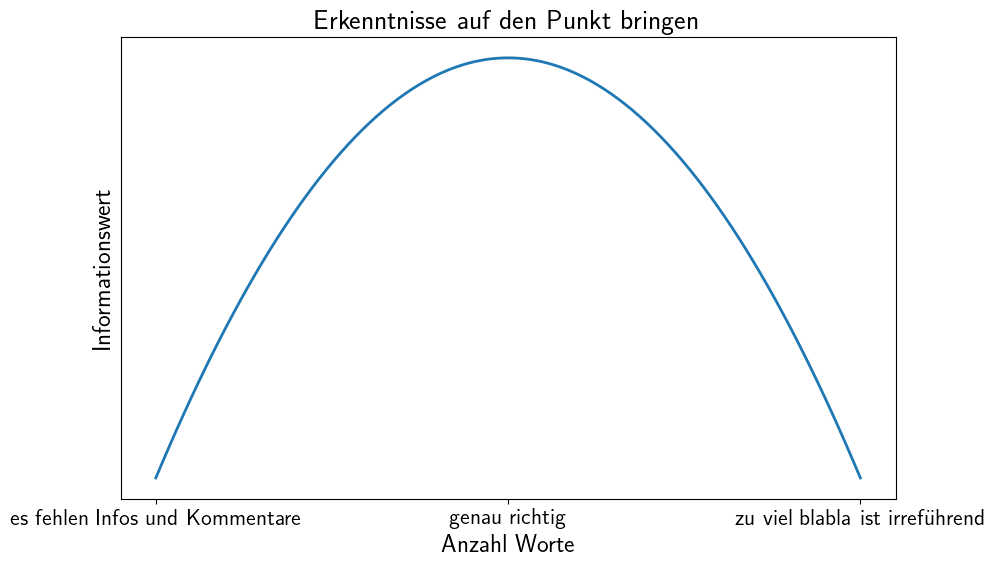

In [3]:
anzahlworte = np.linspace(0,1,100)
infowert = 1- (anzahlworte-0.5)**2
plt.plot(anzahlworte, infowert)
plt.ylabel('Informationswert')
plt.yticks([])
plt.xlabel('Anzahl Worte')
plt.xticks([0,0.5,1],['es fehlen Infos und Kommentare','genau richtig','zu viel blabla ist irreführend'])
plt.title('Erkenntnisse auf den Punkt bringen')

Es gibt also für längere und textlastigere Notebooks nicht unbedingt eine bessere Note! Es ist andererseits auch nicht ausreichend, nichts zu kommentieren. Ihre Fähigkeit, die gefundenen Erkenntnisse auf den Punkt zu bringen, ist gefordert!

<div class="alert alert-block alert-warning"><b>Mit Kopie-Daten arbeiten: </b>Speichern Sie Messdaten und Berechnungsdateien an einem sicheren Ort und legen Sie Versionen
an bzw. arbeiten Sie an Kopien von Datendateien. So haben Sie Ihre Original-Daten noch, falls die
Kopie-Daten bei der Bearbeitung Schaden nehmen.</div>

<div class="alert alert-block alert-warning"><b>Daten sichern: </b>Auch Bilder, Literaturquellen, Jupyter Notebooks (ohne den Output benötigen Sie wesentlich
weniger Speicherplatz), Excel-Tabellen zur Auswertung und für Anforderungen, handschriftliche
und digitale Notizen sind Daten und gehören an einen sicheren Ort.</div>

<div class="alert alert-block alert-success"><b>Die Präsentation fasst zusammen, was man aus der Untersuchung lernen kann. D.h. es ist wichtig, dass Sie relevante Randbedingungen wiederholen, damit man Ihre Vorgehensweise versteht. Ebenso ist es wichtig, die Ergebnisse zu diskutieren und ein Fazit zu bilden, mit den wichtigsten Erkenntnissen und weiteren Fragestellungen für später (Ausblick). Wenn Sie vorher nachvollziehbar gearbeitet haben und sauber dokumentiert haben, ist es ziemlich wahrscheinlich, dass Sie glaubwürdige (stimmige) Ergebnisse präsentieren werden, die auch einen potenziellen Chef oder Kunden in Ihre Arbeit vertrauen lassen.</b></div>

## Formales

 Das, was Sie in den Meilensteinen zeigen, wird dann bewertet, wenn sich in der Endabgabe offene Punkte finden. Sie dürfen also auch für die Meilensteine noch Zwischenstände zeigen, die noch nicht fertig sind und diese Ergebnisse später noch korrigieren. 

- *Meilenstein 1*: 5 min. pro Projekt folgendes präsentieren: erste Messung mit Energielogger in jupyter notebook ausgewertet und Anforderungen an System in erster Version definiert, zum [Abgabetermin](termine) in ilias alle zugehörigen Unterlagen hochladen und am [Meilensteintermin 1](termine) präsentieren

- *Meilenstein 2*: 5 min. pro Projekt folgendes präsentieren: erste Energiesparmaßnahme mithilfe von jupyter Notebook Analyse von Lastprofilen ausgewertet, zum [Abgabetermin](termine) in ilias alle zugehörigen Unterlagen hochladen und am [Meilensteintermin 2](termine) präsentieren

- *Abgabe der Unterlagen*: zum [Projektabgabetermin](termine) in ilias

- *Abzugebendes Verzeichnis*: bei Abgabe in ilias komplettes Verzeichnis zippen, in dem sich jupyter notebook mit Präsentationseinstellungen oder Präsentationsfolien befinden sowie alle Messdateien, Thermografiebilder, Bewertungstabellen, etc., die zur Bearbeitung des Projektes gedient haben - testen Sie, ob sich das jupyter notebook dann von jemand anderem ausführen lässt und fügen Sie ggf. dann noch fehlende Dateien zum Verzeichnis hinzu

<div class="alert alert-block alert-danger"><b>Wichtige Formatierungshinweise: </b>

- Bitte geben Sie für die Meilensteine und die Enddokumentation jeweils **nur eine Abgabe pro Projektteam** ab. 
- <b>jpg</b>-Dateien immer <b>kleingeschrieben</b> mit `.jpg` am Ende benennen, sonst Probleme in jupyterhub!
- alle anderen Dateien auch <b>mit kleingeschriebenen Endungen</b> versehen
- Dateien sinnvoll benennen, z. B. `2021-04-01_aprilscherz.ipynb` und nicht `alte_version_andere_messung_neu_2b.ipynb`
- <b>Leerzeichen in Dateinamen durch `_` </b> ersetzen (sonst Probleme mit Links in Markdown)
- <b>ß, ä, ö, ü in Dateinamen durch `ss`, `ae`, `oe`, `ue`</b> ersetzen (sonst Probleme beim Einlesen im Code)
- <b>Bilder nicht per drag and drop</b> sondern <b>in mit abzugebendem Ordner `img`</b> einbinden, denn sonst werden die nur auf den Rechnern dargestellt, die Zugriff auf dieses Verzeichnis haben und bei mir nicht
- wenn <b>Dateinamen geändert werden</b> unbedingt <b> Notebooks nochmal laufen lassen (`restart and run all`) und ggf. Links an neue Dateinamen anpassen</b>
- <b>alle verlinkten Dateien mit abgeben</b> mit Ausnahme von im Internet frei verfügbaren
- für Präsentation mit RISE wichtige Aspekte auswählen und vorher üben **im jupyterhub** (5 min. sind kurz)
</div>

- *Dateinamenskonvention*:
 - 1990-05-18_SYE_ProjektA_Thermografie_Bildschirm_LG_IPS231.png
 - 1995-08-20_SYE_ProjektB_Anforderungen_Smartphone.xlsx

- *Sichtbarmachen individueller Leistungsanteile:* Tabelle mit abgeben, in der für jedes Arbeitspaket prozentual der Anteil jedes Teammitglieds (mit Name und Matrikelnummer steht und Hauptanteile jeweils selbst präsentieren

- *Präsentationsablauf*: pro Projekt 15 Minuten für die Präsentation und 5 Minuten für die Diskussion

- *Bewertung:* hauptsächlich das präsentierte Ergebnis und das jupyter notebook, stichprobenartig auch eingereichte Unterlagen
- *Bewertungskriterien:* nachvollziehbare Analyse und Evaluation, d.h. begründete und dokumentierte Annahmen, Berechnungen und Messungen, daraus begründete Ableitung von Empfehlungen für die nächsten Schritte
- *Ergebnisbewertung, wenn der Ist-Zustand schon gut ist:* auch die begründete Erkenntnis, dass eine Maßnahme nicht den erhofften Verbesserungserfolg bringt, ist eine wertvolle Erkenntnis, denn dann kann man sich unnötige Aufwände für weitere Umsetzungen sparen und sich auf die Maßnahmen konzentrieren, die etwas bringen
- *Unentschuldigtes Fehlen oder verspätetes Einreichen der Unterlagen:* Attest notwendig, sonst Bewertung 5,0 der Teilprüfungsleistung Projekt und damit Nicht-Bestehen des Moduls
- *Plagiate:* Bewertung mit 5,0
- *Literatur:* Zitationsregeln beachten, siehe z. B. die Unterlagen hier

**Ich wünsche viel Erfolg und viel Freude bei der Arbeit an den Projekten und bin schon gespannt auf die Ergebnisse!**

```{bibliography}
:filter: docname in docnames
```